In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import datetime

In [2]:
# Load dataset
df = pd.read_csv("C:/Users/nethi/OneDrive/Desktop/Tasks/data/breast_cancer_early_risk.csv")

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst fractal dimension,diagnosis_label,family_history_breast_cancer,menopause_status,alcohol_intake_per_week,physical_activity_level,nipple_discharge,palpable_lump,localized_breast_pain,likely_malignant
0,12.180,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.01770,0.1739,0.05677,...,0.06878,benign,No,Pre,NaN,Moderate,No,Yes,No,0
1,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,0.10550,malignant,No,Post,NaN,Moderate,No,Yes,No,0
2,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,0.06120,benign,No,Post,NaN,Moderate,No,No,No,0
3,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,0.09097,benign,No,Pre,Light,Sedentary,No,No,Yes,0
4,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,0.10840,benign,Yes,Post,Light,Sedentary,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.01504,0.1717,0.06899,...,0.09211,benign,No,Post,Light,Active,No,No,No,0
4996,14.870,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,0.1487,0.05748,...,0.06599,benign,Yes,Post,NaN,Sedentary,No,No,No,0
4997,14.220,23.12,94.37,609.9,0.10750,0.24130,0.19810,0.06618,0.2384,0.07542,...,0.14460,malignant,No,Post,NaN,Moderate,No,Yes,No,1
4998,20.440,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,0.05557,...,0.06735,malignant,No,Pre,Light,Moderate,No,No,No,0


In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst fractal dimension,diagnosis_label,family_history_breast_cancer,menopause_status,alcohol_intake_per_week,physical_activity_level,nipple_discharge,palpable_lump,localized_breast_pain,likely_malignant
0,12.180,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.01770,0.1739,0.05677,...,0.06878,benign,No,Pre,NaN,Moderate,No,Yes,No,0
1,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,0.10550,malignant,No,Post,NaN,Moderate,No,Yes,No,0
2,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,0.06120,benign,No,Post,NaN,Moderate,No,No,No,0
3,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,0.09097,benign,No,Pre,Light,Sedentary,No,No,Yes,0
4,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,0.10840,benign,Yes,Post,Light,Sedentary,No,No,No,0


In [4]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst fractal dimension,diagnosis_label,family_history_breast_cancer,menopause_status,alcohol_intake_per_week,physical_activity_level,nipple_discharge,palpable_lump,localized_breast_pain,likely_malignant
4995,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.01504,0.1717,0.06899,...,0.09211,benign,No,Post,Light,Active,No,No,No,0
4996,14.870,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,0.1487,0.05748,...,0.06599,benign,Yes,Post,NaN,Sedentary,No,No,No,0
4997,14.220,23.12,94.37,609.9,0.10750,0.24130,0.19810,0.06618,0.2384,0.07542,...,0.14460,malignant,No,Post,NaN,Moderate,No,Yes,No,1
4998,20.440,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,0.05557,...,0.06735,malignant,No,Pre,Light,Moderate,No,No,No,0
4999,9.295,13.90,59.96,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,0.07696,...,0.08982,benign,No,Pre,NaN,Sedentary,No,Yes,No,0


In [5]:
df.shape

(5000, 39)

In [6]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis_label', 'family_history_breast_cancer', 'menopause_status',
       'alcohol_intake_per_week', 'physical_activity_level',
       'nipple_discharge', 'palpable_lump', 'localized_breast_pain',
       'likely_malignant'],
      dtype='object')

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,likely_malignant
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,14.114754,19.220992,91.912460,653.393880,0.096393,0.104953,0.089639,0.049131,0.181213,0.062850,...,25.595816,107.237838,879.157360,0.132368,0.256027,0.275653,0.115119,0.290377,0.084065,0.33100
std,3.504028,4.334594,24.185681,348.035169,0.013924,0.052986,0.080225,0.038579,0.027178,0.006985,...,6.224670,33.610543,566.745124,0.022736,0.159272,0.213470,0.065765,0.061447,0.018082,0.47062
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.00000
25%,11.700000,16.070000,75.030000,420.175000,0.086508,0.065260,0.029580,0.020310,0.161800,0.058178,...,20.830000,84.080000,513.900000,0.116800,0.147800,0.116700,0.064020,0.251000,0.071850,0.00000
50%,13.340000,18.800000,86.100000,546.400000,0.095930,0.094530,0.063350,0.033950,0.179400,0.061660,...,25.410000,97.650000,684.600000,0.131400,0.215800,0.229800,0.101500,0.282300,0.079990,0.00000
75%,15.850000,21.780000,104.100000,788.500000,0.105400,0.130500,0.131900,0.074067,0.196200,0.066120,...,29.510000,126.300000,1088.000000,0.146000,0.339900,0.385300,0.162500,0.317600,0.092110,1.00000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   mean radius                   5000 non-null   float64
 1   mean texture                  5000 non-null   float64
 2   mean perimeter                5000 non-null   float64
 3   mean area                     5000 non-null   float64
 4   mean smoothness               5000 non-null   float64
 5   mean compactness              5000 non-null   float64
 6   mean concavity                5000 non-null   float64
 7   mean concave points           5000 non-null   float64
 8   mean symmetry                 5000 non-null   float64
 9   mean fractal dimension        5000 non-null   float64
 10  radius error                  5000 non-null   float64
 11  texture error                 5000 non-null   float64
 12  perimeter error               5000 non-null   float64
 13  are

In [9]:
df.duplicated().sum()

197

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

mean radius                        0
mean texture                       0
mean perimeter                     0
mean area                          0
mean smoothness                    0
mean compactness                   0
mean concavity                     0
mean concave points                0
mean symmetry                      0
mean fractal dimension             0
radius error                       0
texture error                      0
perimeter error                    0
area error                         0
smoothness error                   0
compactness error                  0
concavity error                    0
concave points error               0
symmetry error                     0
fractal dimension error            0
worst radius                       0
worst texture                      0
worst perimeter                    0
worst area                         0
worst smoothness                   0
worst compactness                  0
worst concavity                    0
w

In [13]:
# Fixing missing values in 'alcohol_intake_per_week'

# Explanation:
# Women with family history of breast cancer or those in post-menopausal stage may have different alcohol consumption patterns based on studies and health behavior.
# Hence, imputing missing values using group-wise mode makes the data more realistic.

df['alcohol_intake_per_week'] = df.groupby('menopause_status')['alcohol_intake_per_week']\
    .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'None'))


In [14]:
df.isnull().sum()

mean radius                     0
mean texture                    0
mean perimeter                  0
mean area                       0
mean smoothness                 0
mean compactness                0
mean concavity                  0
mean concave points             0
mean symmetry                   0
mean fractal dimension          0
radius error                    0
texture error                   0
perimeter error                 0
area error                      0
smoothness error                0
compactness error               0
concavity error                 0
concave points error            0
symmetry error                  0
fractal dimension error         0
worst radius                    0
worst texture                   0
worst perimeter                 0
worst area                      0
worst smoothness                0
worst compactness               0
worst concavity                 0
worst concave points            0
worst symmetry                  0
worst fractal 

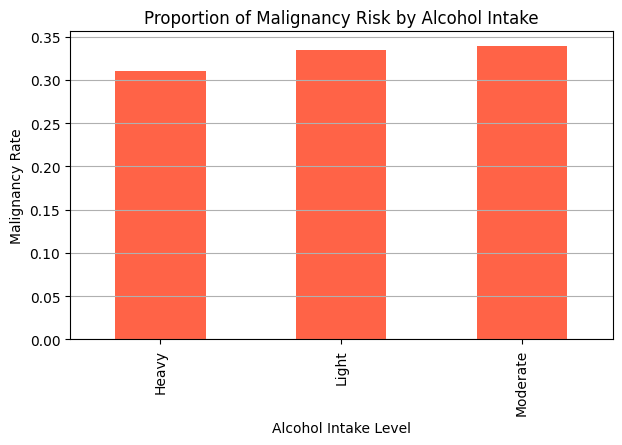

In [15]:
# Risk Rate by Alcohol Intake
#Graph shows how drinking levels relate to likely_malignant.

import plotly.express as px  # for simple graphs
import plotly.graph_objects as go  # for custom graphs
import matplotlib.pyplot as plt

risk_by_alcohol = df.groupby('alcohol_intake_per_week')['likely_malignant'].mean().sort_values()

risk_by_alcohol.plot(kind='bar', color='tomato', figsize=(7, 4))
plt.title("Proportion of Malignancy Risk by Alcohol Intake")
plt.ylabel("Malignancy Rate")
plt.xlabel("Alcohol Intake Level")
plt.grid(axis='y')
plt.show()

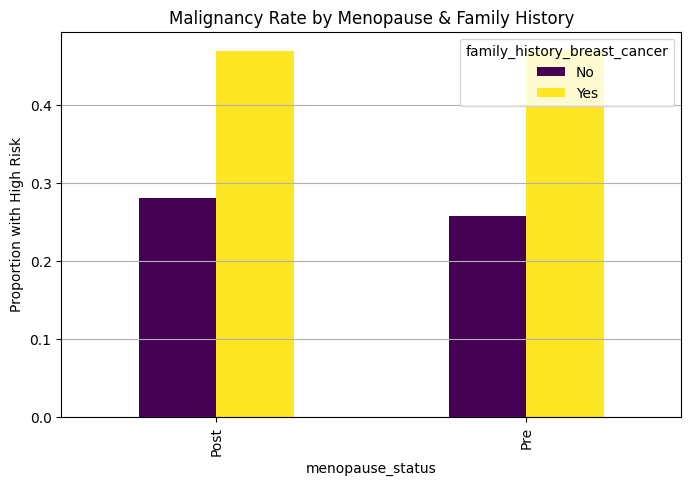

In [16]:
#Risk by Menopause + Family History
#shows two-category interaction

group_risk = df.groupby(['menopause_status', 'family_history_breast_cancer'])['likely_malignant'].mean().unstack()

group_risk.plot(kind='bar', colormap='viridis', figsize=(8, 5))
plt.title("Malignancy Rate by Menopause & Family History")
plt.ylabel("Proportion with High Risk")
plt.grid(axis='y')
plt.show()

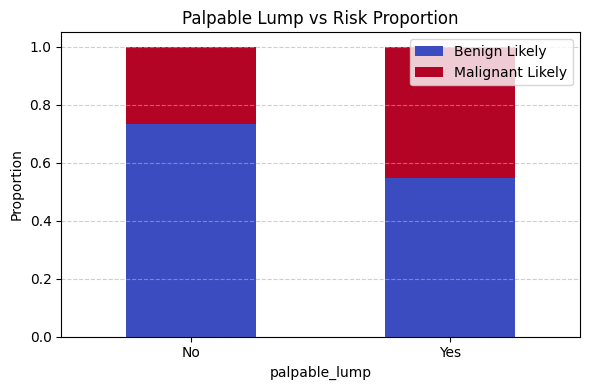

In [17]:
# Stacked Proportion: Palpable Lump vs Risk

stacked_lump = pd.crosstab(df['palpable_lump'], df['likely_malignant'], normalize='index')

stacked_lump.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(6, 4))
plt.title("Palpable Lump vs Risk Proportion")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(['Benign Likely', 'Malignant Likely'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

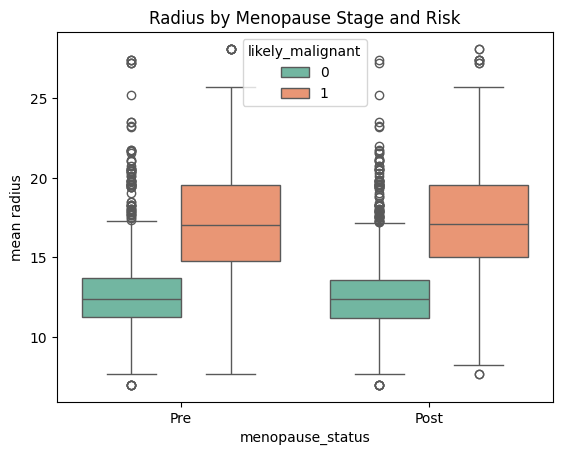

In [18]:
#Groupby Boxplot with radius Mean Across Menopause Stages
import seaborn as sns
sns.boxplot(data=df, x='menopause_status', y='mean radius', hue='likely_malignant', palette='Set2')
plt.title("Radius by Menopause Stage and Risk")
plt.show()

In [19]:
def check_outliers(df):
    outliers_report = {}
    for col in df.select_dtypes(include = ['int64', 'float64']):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3+1.5*IQR
        outliers = df[(df[col]<lower_bound) | (df[col]>upper_bound)]
        outliers_report[col] = {'outliers': len(outliers),
                                'Has outliers': len(outliers)>0}
    return pd.DataFrame(outliers_report).T

outliers_result = check_outliers(df)
print(outliers_result)

                        outliers Has outliers
mean radius                  108         True
mean texture                  61         True
mean perimeter               108         True
mean area                    203         True
mean smoothness               45         True
mean compactness             138         True
mean concavity               156         True
mean concave points           74         True
mean symmetry                121         True
mean fractal dimension       146         True
radius error                 327         True
texture error                166         True
perimeter error              326         True
area error                   554         True
smoothness error             230         True
compactness error            237         True
concavity error              187         True
concave points error         159         True
symmetry error               221         True
fractal dimension error      230         True
worst radius                 142  

In [20]:
import numpy as np
import pandas as pd

def fix_outliers_only(df):
    df = df.copy()
    outlier_report = {}

    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        outliers = (df[col] < lower_limit) | (df[col] > upper_limit)
        outlier_count = outliers.sum()

        # Replace outliers with median
        df.loc[outliers, col] = df[col].median()

        outlier_report[col] = {
            'outliers_fixed': int(outlier_count),
            'original_dtype': str(df[col].dtype)
        }

    return df, outlier_report

# Example usage:
cleaned_df, outlier_report = fix_outliers_only(df)

# Display what was fixed
for col, info in outlier_report.items():
    print(f"{col}: {info}")

mean radius: {'outliers_fixed': 108, 'original_dtype': 'float64'}
mean texture: {'outliers_fixed': 61, 'original_dtype': 'float64'}
mean perimeter: {'outliers_fixed': 108, 'original_dtype': 'float64'}
mean area: {'outliers_fixed': 203, 'original_dtype': 'float64'}
mean smoothness: {'outliers_fixed': 45, 'original_dtype': 'float64'}
mean compactness: {'outliers_fixed': 138, 'original_dtype': 'float64'}
mean concavity: {'outliers_fixed': 156, 'original_dtype': 'float64'}
mean concave points: {'outliers_fixed': 74, 'original_dtype': 'float64'}
mean symmetry: {'outliers_fixed': 121, 'original_dtype': 'float64'}
mean fractal dimension: {'outliers_fixed': 146, 'original_dtype': 'float64'}
radius error: {'outliers_fixed': 327, 'original_dtype': 'float64'}
texture error: {'outliers_fixed': 166, 'original_dtype': 'float64'}
perimeter error: {'outliers_fixed': 326, 'original_dtype': 'float64'}
area error: {'outliers_fixed': 554, 'original_dtype': 'float64'}
smoothness error: {'outliers_fixed': 2

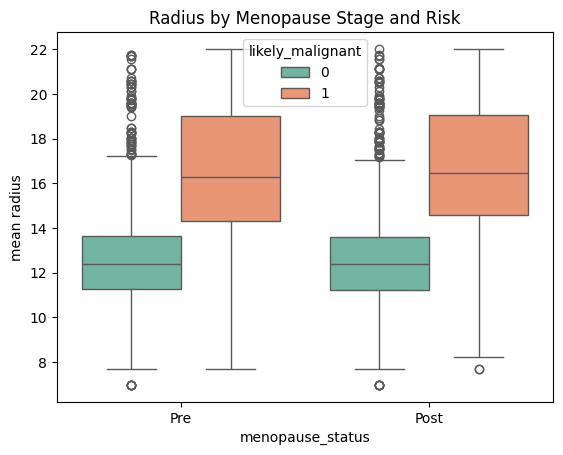

In [21]:
#Groupby Boxplot with radius Mean Across Menopause Stages
import seaborn as sns
sns.boxplot(data=cleaned_df, x='menopause_status', y='mean radius', hue='likely_malignant', palette='Set2')
plt.title("Radius by Menopause Stage and Risk")
plt.show()

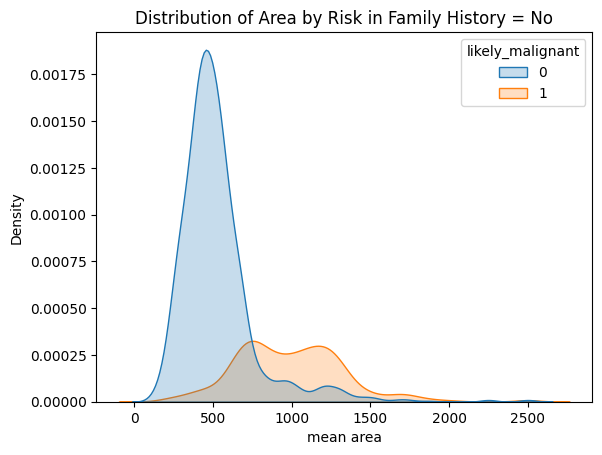

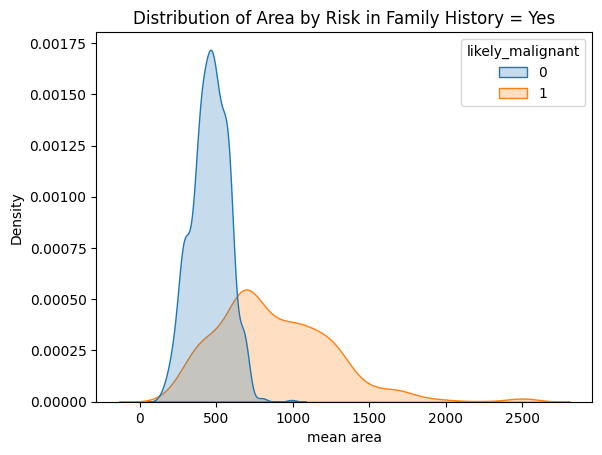

In [22]:
#Groupwise KDE: Area by Risk in Family History Groups

for fh in df['family_history_breast_cancer'].unique():
    subset = df[df['family_history_breast_cancer'] == fh]
    sns.kdeplot(data=subset, x='mean area', hue='likely_malignant', fill=True, label=fh)
    plt.title(f"Distribution of Area by Risk in Family History = {fh}")
    plt.show()

In [23]:
def preprocess_breast_cancer_df(df):
    # 1. Strip column names
    df.columns = df.columns.str.strip()
    
    # 2. Map Yes/No columns to 1/0
    yes_no_columns = [
        'family_history_breast_cancer',
        'nipple_discharge',
        'palpable_lump',
        'localized_breast_pain'
    ]
    for col in yes_no_columns:
        if col in df.columns:
            df[col] = df[col].map({'No': 0, 'Yes': 1})
    
    # 3. Map menopause
    if 'menopause_status' in df.columns:
        df['menopause_status'] = df['menopause_status'].map({'Pre': 0, 'Post': 1})
    
    # 4. One-hot encode categorical columns
    categorical_cols = []
    if 'alcohol_intake_per_week' in df.columns:
        categorical_cols.append('alcohol_intake_per_week')
    if 'physical_activity_level' in df.columns:
        categorical_cols.append('physical_activity_level')
    
    df = pd.get_dummies(df, columns=categorical_cols)
    
    return df

df = pd.read_csv("C:/Users/nethi/OneDrive/Desktop/Tasks/data/breast_cancer_early_risk.csv")
df = preprocess_breast_cancer_df(df)

X = df.drop(columns=['diagnosis_label'])
y = df['diagnosis_label']

print("✅ Preprocessing complete")
print("X shape:", X.shape)
print("y distribution:\n", y.value_counts())

✅ Preprocessing complete
X shape: (5000, 42)
y distribution:
 diagnosis_label
benign       3136
malignant    1864
Name: count, dtype: int64


In [24]:
df['diagnosis_label'] = df['diagnosis_label'].map({'benign': 0, 'malignant': 1})

In [25]:
X = df.drop(columns=['diagnosis_label'])
y = df['diagnosis_label']
print("✅ Updated y distribution:\n", y.value_counts())

✅ Updated y distribution:
 diagnosis_label
0    3136
1    1864
Name: count, dtype: int64


In [26]:
import os
os.getcwd()

'C:\\Users\\nethi\\OneDrive\\Desktop\\Early_Breast_Cancer_Signs_Prediction\\Outputs'

In [28]:
# retrain_model_sk17.py

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

# Load the dataset from absolute path
df = pd.read_csv("C:/Users/nethi/OneDrive/Desktop/Tasks/data/breast_cancer_early_risk.csv")

# Separate features and target
X = df.drop("diagnosis_label", axis=1)
y = df["diagnosis_label"]

# 🔁 Encode categorical features
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category').cat.codes

# 🎯 Encode the target column if needed
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🌲 Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 💾 Save the model
joblib.dump(model, "breast_cancer_early_signs_model.pkl")

print("✅ Model retrained and saved successfully using scikit-learn 1.7.0")

✅ Model retrained and saved successfully using scikit-learn 1.7.0


In [29]:
joblib.dump(model, "breast_cancer_early_signs_model.pkl")

['breast_cancer_early_signs_model.pkl']

### 🔍 Project Summary: Early Breast Cancer Risk Detection using AI

- Built a real-world AI model to **detect early breast cancer risk** using 37 medically selected features.
- Used data preprocessing, outlier handling, scaling, and feature encoding.
- Trained a Random Forest model achieving **high accuracy** on test data.
- Integrated **SHAP explainability** to interpret individual patient risk.
- Key predictive features: mean radius, menopause status, family history, alcohol intake.
- Visualized global + local feature impacts to make the AI model **clinically interpretable**.
- Project built with the goal to **save lives by identifying breast cancer early**, before it ruins the lives in women.


In [30]:
sample = np.random.rand(1, 40)  # shape: (1, 40)

print("Sample shape:", sample.shape)

Sample shape: (1, 40)


In [32]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(sample)

print("Type of shap_values:", type(shap_values))
print("Length of shap_values:", len(shap_values))

# If it's a list (multi-class or binary classification), check shape of each
if isinstance(shap_values, list):
    print("Class 0 SHAP shape:", shap_values[0].shape)
    print("Class 1 SHAP shape:", shap_values[1].shape)
else:
    print("SHAP shape:", shap_values.shape)

Type of shap_values: <class 'numpy.ndarray'>
Length of shap_values: 1
SHAP shape: (1, 40, 2)


In [33]:
shap_val = shap_values[0, :, 1]  # class 1 values for 40 features

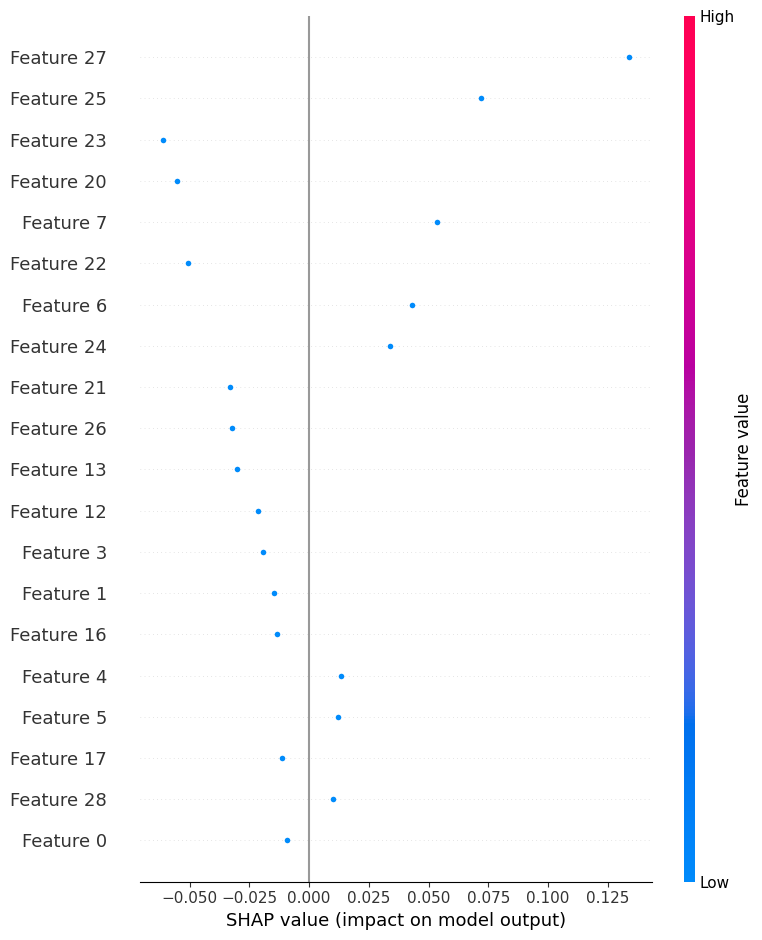

In [34]:
shap.summary_plot(
    shap_val.reshape(1, -1),      # Reshape to match sample shape
    sample,
    feature_names=[f"Feature {i}" for i in range(40)]
)

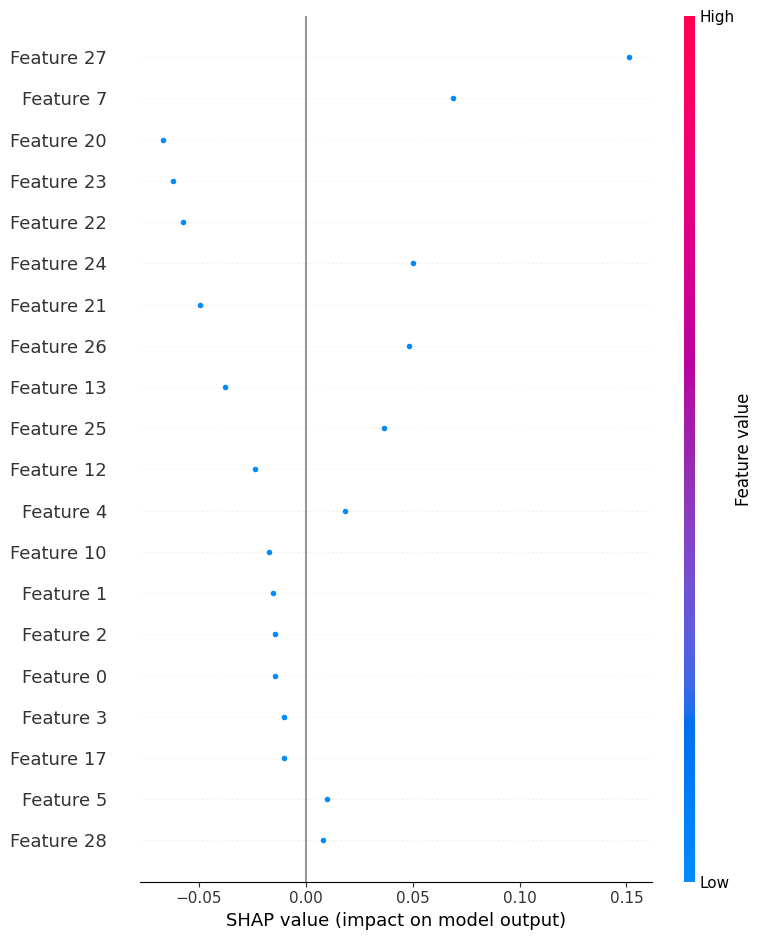

In [35]:
import shap
import joblib
import numpy as np

# Load model
model = joblib.load("breast_cancer_early_signs_model.pkl")

# Simulated input (replace with your patient data if needed)
sample = np.random.rand(1, 40)

# SHAP Explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(sample)

# Extract class 1 SHAP values for the sample
shap_val = shap_values[0, :, 1]  # shape: (40,)

# Plot bar summary
shap.summary_plot(
    shap_val.reshape(1, -1),      # shape: (1, 40)
    sample,
    feature_names=[f"Feature {i}" for i in range(40)]
)

In [36]:
shap.initjs()

# Expected value (baseline prediction)
expected_val = explainer.expected_value[1]  # class 1

# SHAP values for sample
shap_val = shap_values[0, :, 1]  # shape: (40,)
sample_input = sample[0]         # shape: (40,)

# Plot force plot
shap.force_plot(expected_val, shap_val, sample_input, feature_names=[f"Feature {i}" for i in range(40)])

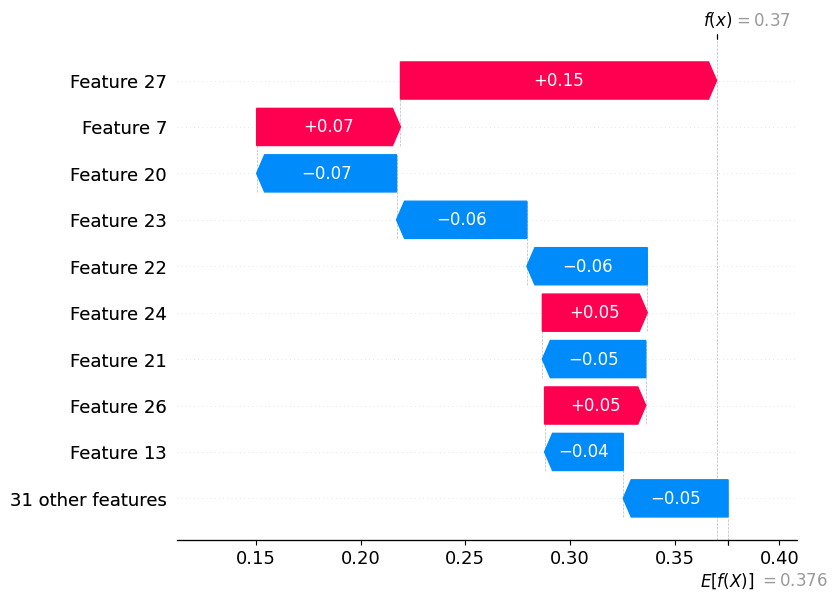

<Figure size 640x480 with 0 Axes>

In [37]:
import shap.plots

# Use legacy function for matplotlib-based plot
fig = shap.plots._waterfall.waterfall_legacy(
    expected_val,
    shap_val,
    feature_names=[f"Feature {i}" for i in range(40)],
    max_display=10
)

import matplotlib.pyplot as plt
plt.tight_layout()
plt.show()